In [21]:
# used functions for cropping eyes and mouth by using dlib
import cv2
import dlib

###############################################################################################

predictor_path = "shape_predictor_68_face_landmarks.dat"
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

###############################################################################################

def crop_eye(img, Target_Size=(224, 224)):
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    # Ask the detector to find the bounding boxes of each face.
    dets = detector(img, 1)
    if len(dets) > 0:
        for k, d in enumerate(dets):
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                k, d.left(), d.top(), d.right(), d.bottom()))
            # Get the landmarks/parts for the face in box d.
            shape = predictor(img, d)
            # The next lines of code just get the coordinates for the right eye
            # and crop the eye from the image.This part can probably be optimised
            # by taking only the outer most points.
            xmouthpoints = [shape.part(18).x, shape.part(19).x, shape.part(20).x, shape.part(21).x, shape.part(36).x, shape.part(37).x, shape.part(38).x, shape.part(39).x, shape.part(40).x,shape.part(41).x]
            ymouthpoints = [shape.part(18).y, shape.part(19).y, shape.part(20).y, shape.part(21).y, shape.part(36).y, shape.part(37).y, shape.part(38).y, shape.part(39).y, shape.part(40).y,shape.part(41).y]
            maxx = max(xmouthpoints)
            minx = min(xmouthpoints)
            maxy = max(ymouthpoints)
            miny = min(ymouthpoints) 

            # to show the eye properly pad both sides
            pad = 10

            crop_image = img[miny-pad:maxy+50,minx-pad:maxx+pad]
            crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB)
#             resized_image = cv2.resize(crop_image,Target_Size)
            return crop_image
    else:
        return None
    
###############################################################################################

def crop_mouth(img, Target_Size=(224, 224)):
    
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    # Ask the detector to find the bounding boxes of each face.
    dets = detector(img, 1)
    if len(dets) > 0:
        for k, d in enumerate(dets):
            print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
                k, d.left(), d.top(), d.right(), d.bottom()))
            # Get the landmarks/parts for the face in box d.
            shape = predictor(img, d)
            # The next lines of code just get the coordinates for the mouth
            # and crop the mouth from the image.This part can probably be optimised
            # by taking only the outer most points.
            xmouthpoints = [shape.part(x).x for x in range(48,67)]
            ymouthpoints = [shape.part(x).y for x in range(48,67)]
            maxx = max(xmouthpoints)
            minx = min(xmouthpoints)
            maxy = max(ymouthpoints)
            miny = min(ymouthpoints) 

            # to show the mouth properly pad both sides
            pad = 10

            crop_image = img[miny-pad:maxy+pad,minx-pad:maxx+pad]
            crop_image = cv2.cvtColor(crop_image, cv2.COLOR_BGR2RGB)
            resized_image = cv2.resize(crop_image,Target_Size)
            return resized_image
    else:
        return None

In [2]:
import numpy as np
import pandas as pd 
import os
import cv2

# labels

In [3]:
labels = os.listdir("dataset")

In [4]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

# visualize random 1 image

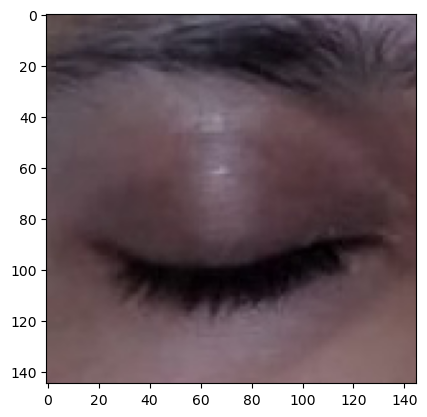

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("dataset/Closed/_0.jpg"))

# image array

In [6]:
a = plt.imread("dataset/yawn/10.jpg")

# image shape

In [7]:
a.shape

(224, 224, 3)

# visualize yawn image. 
# Here background is unnecessary. we need only face image array

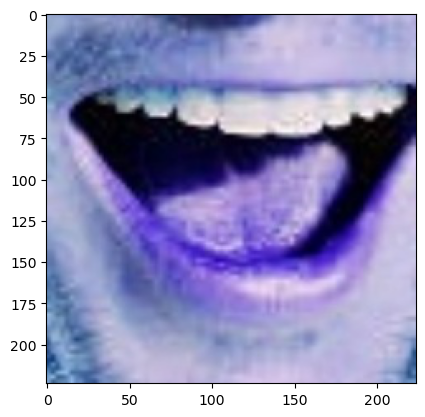

In [8]:
plt.imshow(plt.imread("dataset/yawn/10.jpg"))

# for yawn and not_yawn. Take only face

In [9]:
def mouth_images(direc="dataset"):
    yaw_no = []
    IMG_SIZE = 224
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            resized_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
            yaw_no.append([resized_array, class_num1])
    return yaw_no

# for closed and open eye

In [10]:
def eyes_images(dir_path="dataset"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 224
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

# extend data and convert array

In [11]:
def append_data():
    total_data = []
    mouth = mouth_images()
    eyes = eyes_images()
    total_data.extend(mouth)
    total_data.extend(eyes)
    return total_data

# new variable to store

In [12]:
new_data = append_data()

0
1
2
3


# separate label and features

In [13]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [14]:
X = np.array(X)
X = X.reshape(-1, 224, 224, 3)

# LabelBinarizer

In [15]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [16]:
y = np.array(y)

# train test split

In [17]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [18]:
len(X_test)

872

# Not necessary, only use to matching with my pc version

In [19]:
# !pip install tensorflow==2.3.1
# !pip install keras==2.4.3

# import some dependencies

In [19]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Data Augmentation

In [20]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Model

In [21]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 256)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [23]:
history = model.fit(train_generator, epochs=35, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/35
64/64 [==============================] - 287s 4s/step - loss: 0.4513 - accuracy: 0.5404 - val_loss: 0.3079 - val_accuracy: 0.7741
Epoch 2/35
64/64 [==============================] - 287s 4s/step - loss: 0.2429 - accuracy: 0.8135 - val_loss: 0.1532 - val_accuracy: 0.8945
Epoch 3/35
64/64 [==============================] - 285s 4s/step - loss: 0.1728 - accuracy: 0.8809 - val_loss: 0.1226 - val_accuracy: 0.9037
Epoch 4/35
64/64 [==============================] - 286s 4s/step - loss: 0.1659 - accuracy: 0.8834 - val_loss: 0.1002 - val_accuracy: 0.9346
Epoch 5/35
64/64 [==============================] - 287s 4s/step - loss: 0.1340 - accuracy: 0.9006 - val_loss: 0.0937 - val_accuracy: 0.9381
Epoch 6/35
64/64 [==============================] - 286s 4s/step - loss: 0.1261 - accuracy: 0.9109 - val_loss: 0.0975 - val_accuracy: 0.9541
Epoch 7/35
64/64 [==============================] - 285s 4s/step - loss: 0.1164 - accuracy: 0.9232 - val_loss: 0.0822 - val_accuracy: 0.9507
Epoch 8/35
64

# history

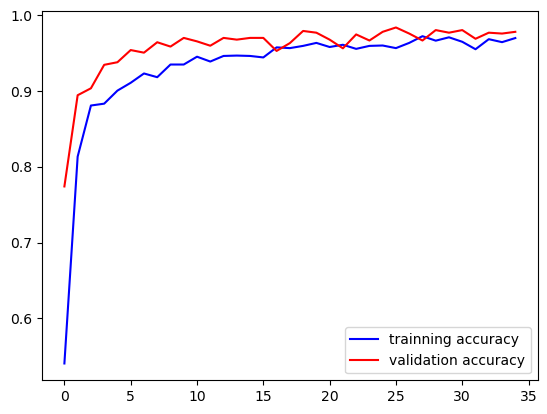

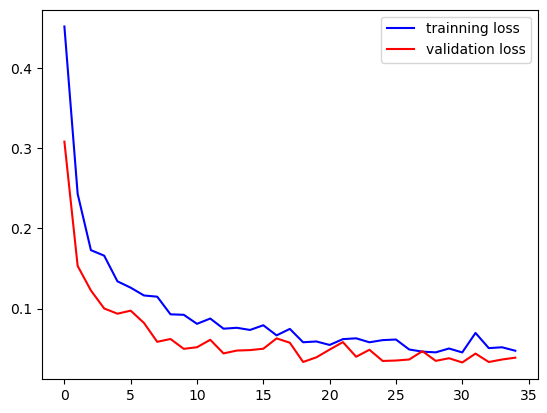

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# save model

In [25]:
model.save("drowsinessmodel.h5")

C:\Users\Khalil\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Prediction

In [27]:
prediction = model.predict(X_test)

19/19 [==============================] - 24s 1s/step


In [28]:
prediction

array([[0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 0.99999994, 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.99999994],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ]], dtype=float32)

# predicting function

In [29]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 224
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("drowsinessmodel.h5")

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [30]:
# prepare("dataset/no_yawn/1068.jpg")
prediction = model.predict([prepare("dataset/no_yawn/1067.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 136ms/step


1

In [31]:
prediction = model.predict([prepare("dataset/Closed/_101.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 58ms/step


2

In [32]:
prediction = model.predict([prepare("dataset/Open/_104.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 57ms/step


3

In [33]:
prediction = model.predict([prepare("dataset/yawn/113.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 57ms/step


1

28/28 [==============================] - 27s 956ms/step


<Figure size 800x600 with 0 Axes>

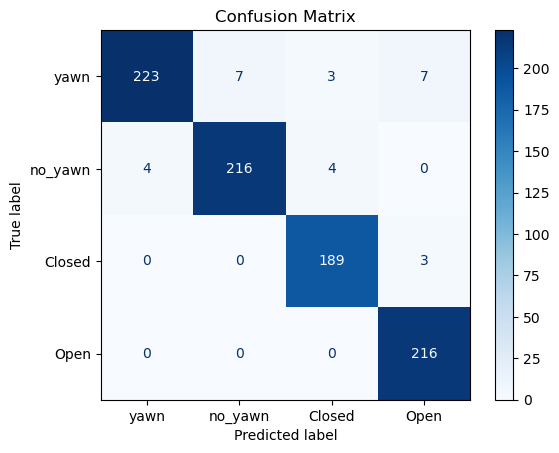

In [20]:
from keras.models import Sequential, load_model
from sklearn import metrics
model = load_model("drowsinessmodel.h5")
y_true = np.argmax(y_test, axis = 1)
prediction = model.predict(X_test)
predicted_classes = np.argmax(prediction, axis = 1)
cm = metrics.confusion_matrix(predicted_classes, y_true)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
metrics.ConfusionMatrixDisplay(cm, display_labels=["yawn", "no_yawn", "Closed", "Open"]).plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()